<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Using-Pandas-pipe-function-to-improve-code-readability" data-toc-modified-id="Using-Pandas-pipe-function-to-improve-code-readability-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Using Pandas pipe function to improve code readability</a></span><ul class="toc-item"><li><span><a href="#visualize-missing-value-with-heatmap" data-toc-modified-id="visualize-missing-value-with-heatmap-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>visualize missing value with heatmap</a></span></li></ul></li><li><span><a href="#Task-to-do" data-toc-modified-id="Task-to-do-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Task to do</a></span><ul class="toc-item"><li><span><a href="#Split-Name-into-first-name-and-second-name" data-toc-modified-id="Split-Name-into-first-name-and-second-name-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Split Name into first name and second name</a></span></li><li><span><a href="#Another-way" data-toc-modified-id="Another-way-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Another way</a></span></li></ul></li><li><span><a href="#For-Sex,-substitute-value-male-with-M-and-female-with-F" data-toc-modified-id="For-Sex,-substitute-value-male-with-M-and-female-with-F-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>For Sex, substitute value male with M and female with F</a></span><ul class="toc-item"><li><span><a href="#another-way" data-toc-modified-id="another-way-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>another way</a></span></li></ul></li><li><span><a href="#Replace-the-missing-Age-with-some-form-of-imputation" data-toc-modified-id="Replace-the-missing-Age-with-some-form-of-imputation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Replace the missing Age with some form of imputation</a></span></li><li><span><a href="#convert-ages-to-groups-of-age-ranges:-≤12,-Teen-(≤18),-Adult-(≤60),-and-Older-(>60)" data-toc-modified-id="convert-ages-to-groups-of-age-ranges:-≤12,-Teen-(≤18),-Adult-(≤60),-and-Older-(>60)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>convert ages to groups of age ranges: ≤12, Teen (≤18), Adult (≤60), and Older (&gt;60)</a></span></li><li><span><a href="#What-is-One-Hot-Encoding?" data-toc-modified-id="What-is-One-Hot-Encoding?-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>What is One-Hot Encoding?</a></span><ul class="toc-item"><li><span><a href="#Why-and-when-shall-we-use-One-Hot-Encoding?" data-toc-modified-id="Why-and-when-shall-we-use-One-Hot-Encoding?-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Why and when shall we use One-Hot Encoding?</a></span><ul class="toc-item"><li><span><a href="#Appending-prefix-to-column-names" data-toc-modified-id="Appending-prefix-to-column-names-6.1.1"><span class="toc-item-num">6.1.1&nbsp;&nbsp;</span>Appending prefix to column names</a></span></li></ul></li><li><span><a href="#For-a-variable-with-more-than-two-possible-values" data-toc-modified-id="For-a-variable-with-more-than-two-possible-values-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>For a variable with more than two possible values</a></span></li><li><span><a href="#Attach-dummies-to-the-dataframe" data-toc-modified-id="Attach-dummies-to-the-dataframe-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Attach dummies to the dataframe</a></span></li><li><span><a href="#Pass-a-dataframe" data-toc-modified-id="Pass-a-dataframe-6.4"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>Pass a dataframe</a></span></li></ul></li><li><span><a href="#pandas-pivot-table" data-toc-modified-id="pandas-pivot-table-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>pandas-pivot-table</a></span></li></ul></div>

https://github.com/BindiChen/machine-learning
# Using Pandas pipe function to improve code readability
Dataset preparation

In [36]:
import pandas as pd
import sys
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [37]:
def load_data():
    return pd.read_csv('data/train.csv')


df = load_data()
df.head(5)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

## visualize missing value with heatmap


<AxesSubplot:>

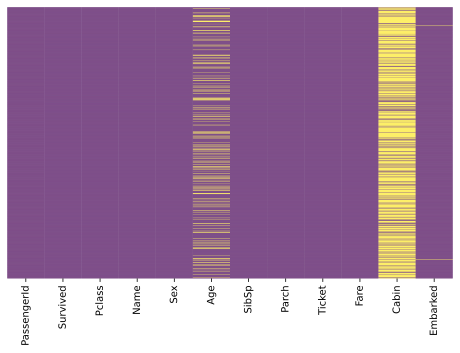

In [38]:
plt.subplots(figsize=(8, 5))

sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

Age, Cabin, and Embarked have missing values. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like a lot of missing values. The proportion of Embarked missing is very small.

# Task to do

Suppose we have been asked to work on the following tasks

    1. Split Name into first name and second name
    2. For Sex, substitute value male with M and female with F
    3. Replace the missing Age with some form of imputation
    4. Convert ages to groups of age ranges: ≤12, Teen (≤18), Adult (≤60), and Older (>60).

##  Split Name into first name and second name

In [39]:
def split_name(x_df):
    def split_name_series(string):
    # is used to apply the split_name_series() function on the values of the Series.
        firstName, secondName = string.split(', ')
        return pd.Series((firstName, secondName), index='firstName secondName'.split())

    # Select the Name column and apply a function
    # x_df['Name'] selects the Name column (Known as a Series in Pandas) and the Pandas apply()

    res = x_df['Name'].apply(split_name_series)
    x_df[res.columns] = res
    return x_df




In [40]:
res = (load_data().pipe(split_name))
res.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  firstName  \
0      0         A/5 21171   7.2500   NaN        S     Braund   
1      0          PC 17599  71.2833   C85        C    Cumings   
2      0  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3      0            113803  53.1000  C123        S   Futrelle   
4      0            373450   8.0500   NaN        S      Allen   

                                   secondName  
0                             Mr. Owen Harris  
1  Mrs. John Bradley (Florence Briggs Thayer)  
2                                 Miss. Laina  
3          Mrs. Jacques Heath (Lily May Peel)  
4                           Mr. William Henry

## Another way

In [41]:
df["firstname"] = df["Name"].str.split(",").str.get(0)
df["secondname"] = df["Name"].str.split(",").str.get(1)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  firstname  \
0      0         A/5 21171   7.2500   NaN        S     Braund   
1      0          PC 17599  71.2833   C85        C    Cumings   
2      0  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3      0            113803  53.1000  C123        S   Futrelle   
4      0            373450   8.0500   NaN        S      Allen   

                                    secondname  
0                              Mr. Owen Harris  
1   Mrs. John Bradley (Florence Briggs Thayer)  
2                                  Miss. Laina  
3           Mrs. Jacques Heath (Lily May Peel)  
4                            Mr. William Henry

# For Sex, substitute value male with M and female with F

In [42]:
df["Sex_short"] = df["Sex"].replace({"male": "M", "female": "F"})
df["Sex_number"] = df["Sex"].replace({"male": 1, "female": 0})
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  firstname  \
0      0         A/5 21171   7.2500   NaN        S     Braund   
1      0          PC 17599  71.2833   C85        C    Cumings   
2      0  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3      0            113803  53.1000  C123        S   Futrelle   
4      0            373450   8.0500   NaN        S      Allen   

                                    secondname Sex_short  Sex_number  
0                              Mr. Owen Harris         M           1  
1   Mrs. John Bradley (Florence Briggs Thayer)         F           0  
2                                  Miss. Laina         F           0  
3           Mrs. Jacques Heath (Lily May Peel)         F           0  
4                            Mr. William Henry         M           1

## another way

In [43]:
def substitute_sex(x_df):
    #     x_df['Sex'] select the Sex column and then the Pandas map() used for 
    #     substituting each value in a Series with another value.
    mapping={'male':'M','female':'F'}
    x_df['Sex_short']=df['Sex'].map(mapping)
    return x_df


res=(
    load_data()
    .pipe(split_name)
    .pipe(substitute_sex)
)

res.head()



PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  firstName  \
0      0         A/5 21171   7.2500   NaN        S     Braund   
1      0          PC 17599  71.2833   C85        C    Cumings   
2      0  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3      0            113803  53.1000  C123        S   Futrelle   
4      0            373450   8.0500   NaN        S      Allen   

                                   secondName Sex_short  
0                             Mr. Owen Harris         M  
1  Mrs. John Bradley (Florence Briggs Thayer)         F  
2                                 Miss. Laina         F  
3          Mrs. Jacques Heath (Lily May Peel)         F  
4                           Mr. William Henry         M

# Replace the missing Age with some form of imputation

We would like to replace the missing Age with some form of imputation. One way to do this is by filling in the mean age of all the passengers. However, we can be smarter about this and check the average age by passenger class.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

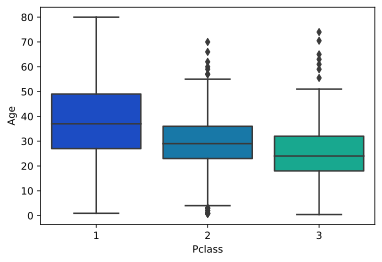

In [44]:
sns.boxplot(x='Pclass',
            y='Age',
            data=df,
            palette='winter')

We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We’ll use these average age values to impute based on Pclass for Age.

In [45]:
pclass_age_map = {
  1: 37,
  2: 29,
  3: 24,
}

def replace_age_na(x_df,fill_map):
    # x_df['Age'].isna() selects the Age column and detects the missing values.
    cond=x_df['Age'].isna() 
    # Then, x_df.loc[cond, 'Pclass'] is used to access Pclass values conditionally 
    #and call Pandas map() for substituting each value with another value.
    res=x_df.loc[cond,'Pclass'].map(fill_map) 
#     Finally, x_df.loc[cond, 'Age']=res conditionally replace all missing Age values with res.
    x_df.loc[cond,'Age']=res
    return x_df

res=(
    load_data()
    .pipe(split_name)
    .pipe(substitute_sex)
    .pipe(replace_age_na, pclass_age_map)
)
res.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  firstName  \
0      0         A/5 21171   7.2500   NaN        S     Braund   
1      0          PC 17599  71.2833   C85        C    Cumings   
2      0  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3      0            113803  53.1000  C123        S   Futrelle   
4      0            373450   8.0500   NaN        S      Allen   

                                   secondName Sex_short  
0                             Mr. Owen Harris         M  
1  Mrs. John Bradley (Florence Briggs Thayer)         F  
2                                 Miss. Laina         F  
3          Mrs. Jacques Heath (Lily May Peel)         F  
4                           Mr. William Henry         M

In [47]:
plt.subplots(figsize=(8,5))
sns.heatmap(res.isnull(), 
            yticklabels=False, 
            cbar=False, 
            cmap='viridis')

<AxesSubplot:>

# convert ages to groups of age ranges: ≤12, Teen (≤18), Adult (≤60), and Older (>60)

In [48]:
def create_age_group(x_df):
    bins=[0, 13, 19, 61, sys.maxsize]
    labels=['<12', 'Teen', 'Adult', 'Older']
    ageGroup=pd.cut(x_df['Age'],bins=bins,labels=labels)
    x_df['ageGroup']=ageGroup
    return x_df

res=(
    load_data()
    .pipe(split_name)
    .pipe(substitute_sex)
    .pipe(replace_age_na, pclass_age_map)
    .pipe(create_age_group)
)

res.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  firstName  \
0      0         A/5 21171   7.2500   NaN        S     Braund   
1      0          PC 17599  71.2833   C85        C    Cumings   
2      0  STON/O2. 3101282   7.9250   NaN        S  Heikkinen   
3      0            113803  53.1000  C123        S   Futrelle   
4      0            373450   8.0500   NaN        S      Allen   

                                   secondName Sex_short ageGroup  
0                             Mr. Owen Harris         M    Adult  
1  Mrs. John Bradley (Florence Briggs Thayer)         F    Adult  
2                                 Miss. Laina         F    Adult  
3          Mrs. Jacques Heath (Lily May Peel)         F    Adult  
4                           Mr. William Henry         M    Adult

# What is One-Hot Encoding?
One Hot Encoding is a process in the data processing that is applied to categorical data, to convert it into a binary vector representation for use in machine learning algorithms.

## Why and when shall we use One-Hot Encoding?

One of the major problems with machine learning is that a lot of algorithms cannot work directly with categorical data. Categorical data  are variables that can take on one of a limited number of possible values. Some examples are:

    1. The sex of a person: female or male.
    2. The airline travel class: First Class, Business Class, and Economy Class.
    3. The computer vendor: Lenovo, HP, Dell, Apple, Acer, Asus, and Others.

Therefore, we need a way to convert categorical data into a numerical form and our machine learning algorithm can take in that as input. The most widely used encoding techniques are:

    1. Integer Encoding: encodes the values as integer.
    2. One-Hot Encoding: encodes the values as a binary vector array.
    3. Dummy Variable Encoding: same as One-Hot Encoding, but one less column.
    
Dummy encoding variable is a standard advice in statistics to avoid the dummy variable trap, However, in the world of machine learning, One-Hot encoding is more recommended because dummy variable trap is not really a problem when applying regularization.

### Appending prefix to column names
By default, get_dummies() use variable values as column names. For instance, male and female in the above Sex column example. To identify where the dummy variables came from, we can use the prefix argument. 

In [75]:
df = load_data()

In [76]:
pd.get_dummies(df.Sex).head()

female  male
0       0     1
1       1     0
2       1     0
3       1     0
4       0     1

In [77]:
pd.get_dummies(df.Sex , prefix="Sex").head()

Sex_female  Sex_male
0           0         1
1           1         0
2           1         0
3           1         0
4           0         1

In [78]:
 pd.get_dummies(df.Sex , prefix="Sex"  , prefix_sep='.').head()

Sex.female  Sex.male
0           0         1
1           1         0
2           1         0
3           1         0
4           0         1

There is some redundancy in One-Hot encoding.  . So we only need to use one of these two dummy-coded variables as a predictor. More generally, the number of dummy-coded variables needed is one less than the number of possible values, which is K-1. In statistics, this is called a dummy encoding variable, or dummy variable.

By default, the get_dummies() does not do dummy encoding, but One-Hot encoding. To produce an actual dummy encoding from a DataFrame, we need to pass drop_first=True

In [61]:
pd.get_dummies(df.Sex , drop_first=True).head()

male
0     1
1     0
2     0
3     0
4     1

##  For a variable with more than two possible values
Now, let’s try to get One-Hot encoding for a variable that has more than two possible values. For instance, there is an Embarked column and we can do value_counts() to check its different values.

In [64]:
df.Embarked.value_counts()


S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [67]:
pd.get_dummies(df.Embarked, prefix='Embarked').head()

Embarked_C  Embarked_Q  Embarked_S
0           0           0           1
1           1           0           0
2           0           0           1
3           0           0           1
4           0           0           1

## Attach dummies to the dataframe

In [70]:
embarked_dummies = pd.get_dummies(df.Embarked, prefix='Embarked')
df = pd.concat([df, embarked_dummies], axis=1)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare  ... Embarked  Embarked_C  Embarked_Q  \
0      0         A/5 21171   7.2500  ...        S           0           0   
1      0          PC 17599  71.2833  ...        C           1           0   
2      0  STON/O2. 3101282   7.9250  ...        S           0           0   
3      0            113803  53.1000  ...        S           0           0   
4      0            373450   8.0500  ...        S           0           0   

   Embarked_S  Embarked_C  Embarked_Q  Embarked_S  Embarked_C  Embarked_Q  \
0           1           0           0           1           0           0   
1           0           1           0           0           1           0   
2           1           0           0           1           0           0   
3           1           0           0           1           0           0   
4           1           0           0           1           0           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1  

[5 rows x 21 columns]

## Pass a dataframe

df is a DataFrame. We pass columns a list and we tell it Sex and Embarked are the columns we want to dummy.

By running df.head(), we can see that the original Sex column and Embarked column are gone, they have been replaced with the dummy columns.

In [71]:
df = load_data() # reset dataframe
df = pd.get_dummies(df, columns=['Sex', 'Embarked'])
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  Sex_female  Sex_male  Embarked_C  \
0         A/5 21171   7.2500   NaN           0         1           0   
1          PC 17599  71.2833   C85           1         0           1   
2  STON/O2. 3101282   7.9250   NaN           1         0           0   
3            113803  53.1000  C123           1         0           0   
4            373450   8.0500   NaN           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1

In [81]:
df = load_data() # reset dataframe
df = pd.get_dummies(df, prefix='', prefix_sep='', columns=['Sex', 'Embarked'])
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  female  male  C  Q  S  
0         A/5 21171   7.2500   NaN       0     1  0  0  1  
1          PC 17599  71.2833   C85       1     0  1  0  0  
2  STON/O2. 3101282   7.9250   NaN       1     0  0  0  1  
3            113803  53.1000  C123       1     0  0  0  1  
4            373450   8.0500   NaN       0     1  0  0  1

In [82]:
df = load_data() # reset dataframe
df = pd.get_dummies(df, prefix='', prefix_sep='', columns=['Sex', 'Embarked'] ,dtype=float)
df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name   Age  SibSp  Parch  \
0                            Braund, Mr. Owen Harris  22.0      1      0   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  38.0      1      0   
2                             Heikkinen, Miss. Laina  26.0      0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  35.0      1      0   
4                           Allen, Mr. William Henry  35.0      0      0   

             Ticket     Fare Cabin  female  male    C    Q    S  
0         A/5 21171   7.2500   NaN     0.0   1.0  0.0  0.0  1.0  
1          PC 17599  71.2833   C85     1.0   0.0  1.0  0.0  0.0  
2  STON/O2. 3101282   7.9250   NaN     1.0   0.0  0.0  0.0  1.0  
3            113803  53.1000  C123     1.0   0.0  0.0  0.0  1.0  
4            373450   8.0500   NaN     0.0   1.0  0.0  0.0  1.0

In [83]:
con = pd.Series(list('abcba'))
print(pd.get_dummies(con))

   a  b  c
0  1  0  0
1  0  1  0
2  0  0  1
3  0  1  0
4  1  0  0


In [85]:
# list
import numpy as np
li = ['s', 'a', 't', np.nan]
print(pd.get_dummies(li))

   a  s  t
0  0  1  0
1  1  0  0
2  0  0  1
3  0  0  0


In [86]:
# list
li = ['s', 'a', 't', np.nan]
print(pd.get_dummies(li, dummy_na=True))

   a  s  t  NaN
0  0  1  0    0
1  1  0  0    0
2  0  0  1    0
3  0  0  0    1


In [87]:
# dictionary
diff = pd.DataFrame({'R': ['a', 'c', 'd'],
                     'T': ['d', 'a', 'c'],
                     'S_': [1, 2, 3]})
 
print(pd.get_dummies(diff, prefix=['column1', 'column2']))

   S_  column1_a  column1_c  column1_d  column2_a  column2_c  column2_d
0   1          1          0          0          0          0          1
1   2          0          1          0          1          0          0
2   3          0          0          1          0          1          0


# pandas-pivot-table

In [ ]:
https://github.com/BindiChen/machine-learning/blob/master/data-analysis/003-pandas-pivot-table/003-pandas-pivot-table.ipynb